Predizendo Preço de games na Steam

In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, mean_absolute_error
import numpy as np


In [209]:
df = pd.read_json('steamdb.json')
df.head(10)

,sid,store_url,store_promo_url,store_uscore,published_store,published_meta,published_stsp,published_hltb,published_igdb,image,...,meta_url,meta_score,meta_uscore,grnk_score,igdb_url,igdb_single,igdb_complete,igdb_score,igdb_uscore,igdb_popularity
0,10,https://store.steampowered.com/app/10,https://www.youtube.com/watch?v=oKC9SAF4JAc,97.0,2000-11-01,2000-11-08,2000-11-01,1999-06-12,1999-06-12,https://steamcdn-a.akamaihd.net/steam/apps/10/...,...,https://www.metacritic.com/game/pc/counter-str...,88.0,92.0,NaN,https://www.igdb.com/games/counter-strike,NaN,NaN,70.0,83.0,25.74
1,20,https://store.steampowered.com/app/20,None,84.0,1999-04-01,1999-04-07,1999-04-01,1999-04-07,1999-04-07,https://steamcdn-a.akamaihd.net/steam/apps/20/...,...,https://www.metacritic.com/game/pc/team-fortre...,NaN,71.0,NaN,https://www.igdb.com/games/team-fortress-classic,NaN,NaN,NaN,70.0,1.67
2,30,https://store.steampowered.com/app/30,https://www.youtube.com/watch?v=j4MCo89bTWE,90.0,2003-05-01,2003-05-06,2003-05-01,2000-08-04,2003-05-01,https://steamcdn-a.akamaihd.net/steam/apps/30/...,...,https://www.metacritic.com/game/pc/day-of-defe...,79.0,91.0,NaN,https://www.igdb.com/games/day-of-defeat,NaN,NaN,71.0,76.0,1.45
3,40,https://store.steampowered.com/app/40,https://www.youtube.com/watch?v=jN_18uhiMS8,82.0,2001-06-01,2001-06-07,2001-06-01,2001-06-01,2001-07-01,https://steamcdn-a.akamaihd.net/steam/apps/40/...,...,https://www.metacritic.com/game/pc/deathmatch-...,NaN,68.0,NaN,https://www.igdb.com/games/deathmatch-classic,NaN,NaN,NaN,75.0,1.00
4,50,https://store.steampowered.com/app/50,https://www.youtube.com/watch?v=ZNZsWm-Ulk4,95.0,1999-11-01,1999-10-31,1999-11-01,1999-11-01,1999-11-10,https://steamcdn-a.akamaihd.net/steam/apps/50/...,...,https://www.metacritic.com/game/pc/half-life-o...,NaN,86.0,NaN,https://www.igdb.com/games/half-life-opposing-...,6.0,4.0,70.0,82.0,3.45
5,60,https://store.steampowered.com/app/60,https://www.youtube.com/watch?v=0NxAdFF0Pv0,81.0,2000-11-01,2000-11-01,2000-11-01,2000-11-01,2000-11-01,https://steamcdn-a.akamaihd.net/steam/apps/60/...,...,https://www.metacritic.com/game/pc/ricochet,NaN,68.0,NaN,https://www.igdb.com/games/ricochet,NaN,NaN,NaN,72.0,2.56
6,70,https://store.steampowered.com/app/70,https://www.youtube.com/watch?v=qobDF0w5qJc,96.0,1998-11-08,1998-11-19,1998-11-08,1998-11-19,1998-11-27,https://steamcdn-a.akamaihd.net/steam/apps/70/...,...,https://www.metacritic.com/game/pc/half-life?f...,96.0,90.0,NaN,https://www.igdb.com/games/half-life,12.0,15.0,80.0,90.0,14.82
7,80,https://store.steampowered.com/app/80,https://www.youtube.com/watch?v=cEoXkWMRD2I,90.0,2004-03-01,2004-01-03,2004-03-01,2004-03-23,2004-03-23,https://steamcdn-a.akamaihd.net/steam/apps/80/...,...,https://www.metacritic.com/game/pc/counter-str...,65.0,87.0,NaN,https://www.igdb.com/games/counter-strike-cond...,NaN,NaN,66.0,75.0,4.12
8,130,https://store.steampowered.com/app/130,https://www.youtube.com/watch?v=vdJwW_0X0Ug,90.0,2001-06-01,2001-06-11,2001-06-01,2001-06-12,2001-06-12,https://steamcdn-a.akamaihd.net/steam/apps/130...,...,https://www.metacritic.com/game/pc/half-life-b...,71.0,82.0,NaN,https://www.igdb.com/games/half-life-blue-shift,4.0,2.0,60.0,72.0,3.67
9,220,https://store.steampowered.com/app/220,https://www.youtube.com/watch?v=ID1dWN3n7q4,97.0,2004-11-16,2004-11-16,2004-11-16,2004-11-16,2004-11-16,https://steamcdn-a.akamaihd.net/steam/apps/220...,...,https://www.metacritic.com/game/pc/half-life-2...,96.0,91.0,NaN,https://www.igdb.com/games/half-life-2,14.0,28.0,91.0,91.0,23.74


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53981 entries, 0 to 53980
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sid                     53981 non-null  int64  
 1   store_url               53981 non-null  object 
 2   store_promo_url         7546 non-null   object 
 3   store_uscore            33462 non-null  float64
 4   published_store         53831 non-null  object 
 5   published_meta          33603 non-null  object 
 6   published_stsp          19616 non-null  object 
 7   published_hltb          25831 non-null  object 
 8   published_igdb          20965 non-null  object 
 9   image                   53981 non-null  object 
 10  name                    53981 non-null  object 
 11  description             53932 non-null  object 
 12  full_price              46817 non-null  float64
 13  current_price           46817 non-null  float64
 14  discount                6529 non-null 

A base de dados têm bastante indices nulos e colunas que não nos dão muita informação como URL do game.
Precisamos retirar itens chave e manter itens que possam ter alguma relevância mas não tenham tantos NaN.

In [211]:

indices_to_drop = [1,2,4,5,6,7,8,9,11,14,15,16,17,18,19,24,26,27,28,30,32,33,36,37,38,39,40,41,42,43,44,45]

# Obter os nomes das colunas correspondentes aos índices
col_names_to_drop = df.columns[indices_to_drop]

# Remover as colunas
df = df.drop(columns=col_names_to_drop)

In [212]:
df.isna().sum()

sid                   0
store_uscore      20519
name                  0
full_price         7164
current_price      7164
categories           70
genres                0
tags              33608
achievements      25265
gfq_difficulty    41626
gfq_length        43271
stsp_owners       18515
hltb_single       39214
hltb_complete     41433
dtype: int64

In [213]:
df.dropna().shape

(3235, 14)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53981 entries, 0 to 53980
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sid             53981 non-null  int64  
 1   store_uscore    33462 non-null  float64
 2   name            53981 non-null  object 
 3   full_price      46817 non-null  float64
 4   current_price   46817 non-null  float64
 5   categories      53911 non-null  object 
 6   genres          53981 non-null  object 
 7   tags            20373 non-null  object 
 8   achievements    28716 non-null  float64
 9   gfq_difficulty  12355 non-null  object 
 10  gfq_length      10710 non-null  float64
 11  stsp_owners     35466 non-null  float64
 12  hltb_single     14767 non-null  float64
 13  hltb_complete   12548 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 5.8+ MB


In [215]:
df.nunique()

sid               53981
store_uscore        100
name              53708
full_price          157
current_price       428
categories         4662
genres             1795
tags              15697
achievements        411
gfq_difficulty        9
gfq_length          715
stsp_owners          13
hltb_single         129
hltb_complete       282
dtype: int64

Podemos categorizar a dificuldade e tentar expandir os multivalorados 'categories' e 'tags'

In [216]:
df['gfq_difficulty'] = df['gfq_difficulty'].astype('category')

df['name']=df['name'].astype('string')

In [217]:
df['genres'].unique()

array(['Action', 'Action,Free to Play', 'Action,Free to Play,Strategy',
       ...,
       'Adventure,Casual,Free to Play,Massively Multiplayer,Simulation,Sports',
       'Action,Adventure,Free to Play,Indie,Sports',
       'Action,Indie,Racing,RPG'], dtype=object)

In [218]:
df['categories'] = df['categories'].apply(lambda x: x.split(',') if x is not None else [])
df['genres'] = df['genres'].apply(lambda x: x.split(',') if x is not None else [])
df['tags'] = df['tags'].apply(lambda x: x.split(',') if x is not None else [])
df.head()

,sid,store_uscore,name,full_price,current_price,categories,genres,tags,achievements,gfq_difficulty,gfq_length,stsp_owners,hltb_single,hltb_complete
0,10,97.0,Counter-Strike,999.0,999.0,"[Multi-player, PvP, Online PvP, Shared/Split S...",[Action],"[Action, FPS, Multiplayer, Shooter, Classic, T...",NaN,Just Right-Tough,64.5,15000000.0,NaN,NaN
1,20,84.0,Team Fortress Classic,499.0,499.0,"[Multi-player, PvP, Online PvP, Shared/Split S...",[Action],"[Action, FPS, Multiplayer, Classic, Shooter, C...",NaN,Just Right-Tough,50.6,3500000.0,NaN,NaN
2,30,90.0,Day of Defeat,499.0,499.0,"[Multi-player, Valve Anti-Cheat enabled]",[Action],"[FPS, World War II, Multiplayer, Action, Shoot...",NaN,Just Right-Tough,53.1,7500000.0,NaN,NaN
3,40,82.0,Deathmatch Classic,499.0,499.0,"[Multi-player, PvP, Online PvP, Shared/Split S...",[Action],"[Action, FPS, Multiplayer, Classic, Shooter, F...",NaN,Just Right-Tough,2.9,7500000.0,NaN,NaN
4,50,95.0,Half-Life: Opposing Force,499.0,499.0,"[Single-player, Multi-player, Valve Anti-Cheat...",[Action],"[FPS, Action, Sci-fi, Singleplayer, Classic, S...",NaN,Just Right,10.7,7500000.0,5.0,7.0


In [219]:
colunas_para_verificar = ['tags', 'categories', 'genres']

# Contando valores únicos para cada coluna
for coluna in colunas_para_verificar:
    # Achatar a lista de listas
    itens_achatados = [item for sublist in df[coluna].dropna() for item in sublist]

    # Obter os valores únicos
    itens_unicos = set(itens_achatados)

    # Contar e exibir o número de itens únicos
    print(f"Número de itens únicos em '{coluna}': {len(itens_unicos)}")

Número de itens únicos em 'tags': 342
Número de itens únicos em 'categories': 41
Número de itens únicos em 'genres': 20


Temos portanto um grande número de generos e categorias e ainda maior de tags. 
Expandir esses indices pode levar a um número muito extenso de colunas e valores para administrar, isso seria adequado para outros tipos de modelo, diferentes dos que estamos trabalhando na matéria. portanto vamos trabalhar apenas com as outras colunas.

In [220]:
# Instanciar o MultiLabelBinarizer para fazer o one-hot encoding
combined_labels = df.apply(lambda x: set(x['categories'] + x['genres'] + x['tags']), axis=1)

# Instanciar o MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Aplicar o one-hot encoding
combined_encoded = pd.DataFrame(mlb.fit_transform(combined_labels), columns=mlb.classes_, index=df.index)

# Concatenar com o DataFrame original
df_encoded = pd.concat([df, combined_encoded], axis=1)

df_encoded.shape

(53981, 397)

In [221]:
df_encoded = df_encoded.dropna()
df_encoded = df_encoded.drop(columns='full_price')
df_encoded_1 = df_encoded.copy()
df_encoded_1['Multi'] = df_encoded_1['Multi-player'] | df_encoded_1['Multiplayer']
df_encoded_2 = df_encoded_1.drop(columns=['Multiplayer', 'Multi-player'])
#df_encoded original com 2 colunas multiplayer
#df_encoded_1 com 3 colunas multiplayer, adicionada uma coluna unificada com operador or
#df_encoded_2 com 1 coluna multiplayer, deixando apenas a unificada

In [222]:
# Calcular a matriz de correlação
corr_matrix = df_encoded.corr()
cols_to_keep = corr_matrix.index[corr_matrix.abs()['current_price'] > 0.2]
cols_to_keep = cols_to_keep.drop('current_price')  # Remover a coluna 'score' da lista
X = df_encoded[cols_to_keep]  # Variáveis independentes
y = df_encoded['current_price']       # Variável dependente
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

corr_matrix = df_encoded_1.corr()
cols_to_keep = corr_matrix.index[corr_matrix.abs()['current_price'] > 0.2]
cols_to_keep = cols_to_keep.drop('current_price')  # Remover a coluna 'score' da lista
X = df_encoded_1[cols_to_keep]  # Variáveis independentes
y = df_encoded_1['current_price']       # Variável dependente
X_sm_1 = sm.add_constant(X)
model_sm_1 = sm.OLS(y, X_sm_1).fit()

corr_matrix = df_encoded_2.corr()
cols_to_keep = corr_matrix.index[corr_matrix.abs()['current_price'] > 0.2]
cols_to_keep = cols_to_keep.drop('current_price')  # Remover a coluna 'score' da lista
X = df_encoded_2[cols_to_keep]  # Variáveis independentes
y = df_encoded_2['current_price']       # Variável dependente
X_sm_2 = sm.add_constant(X)
model_sm_2 = sm.OLS(y, X_sm_2).fit()

# Exibir o sumário do modelo
print(model_sm.summary())
print(model_sm_1.summary())
print(model_sm_2.summary())

C:\Users\Lucia\AppData\Local\Temp\ipykernel_13716\262100777.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_encoded.corr()
C:\Users\Lucia\AppData\Local\Temp\ipykernel_13716\262100777.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_encoded_1.corr()
C:\Users\Lucia\AppData\Local\Temp\ipykernel_13716\262100777.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_encoded_2.corr()


                            OLS Regression Results                            
Dep. Variable:          current_price   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     228.1
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:                -31282.
No. Observations:                3803   AIC:                         6.259e+04
Df Residuals:                    3789   BIC:                         6.268e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1575.6618     41.37

C:\Users\Lucia\AppData\Local\Temp\ipykernel_13716\3935636197.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_encoded.corr()


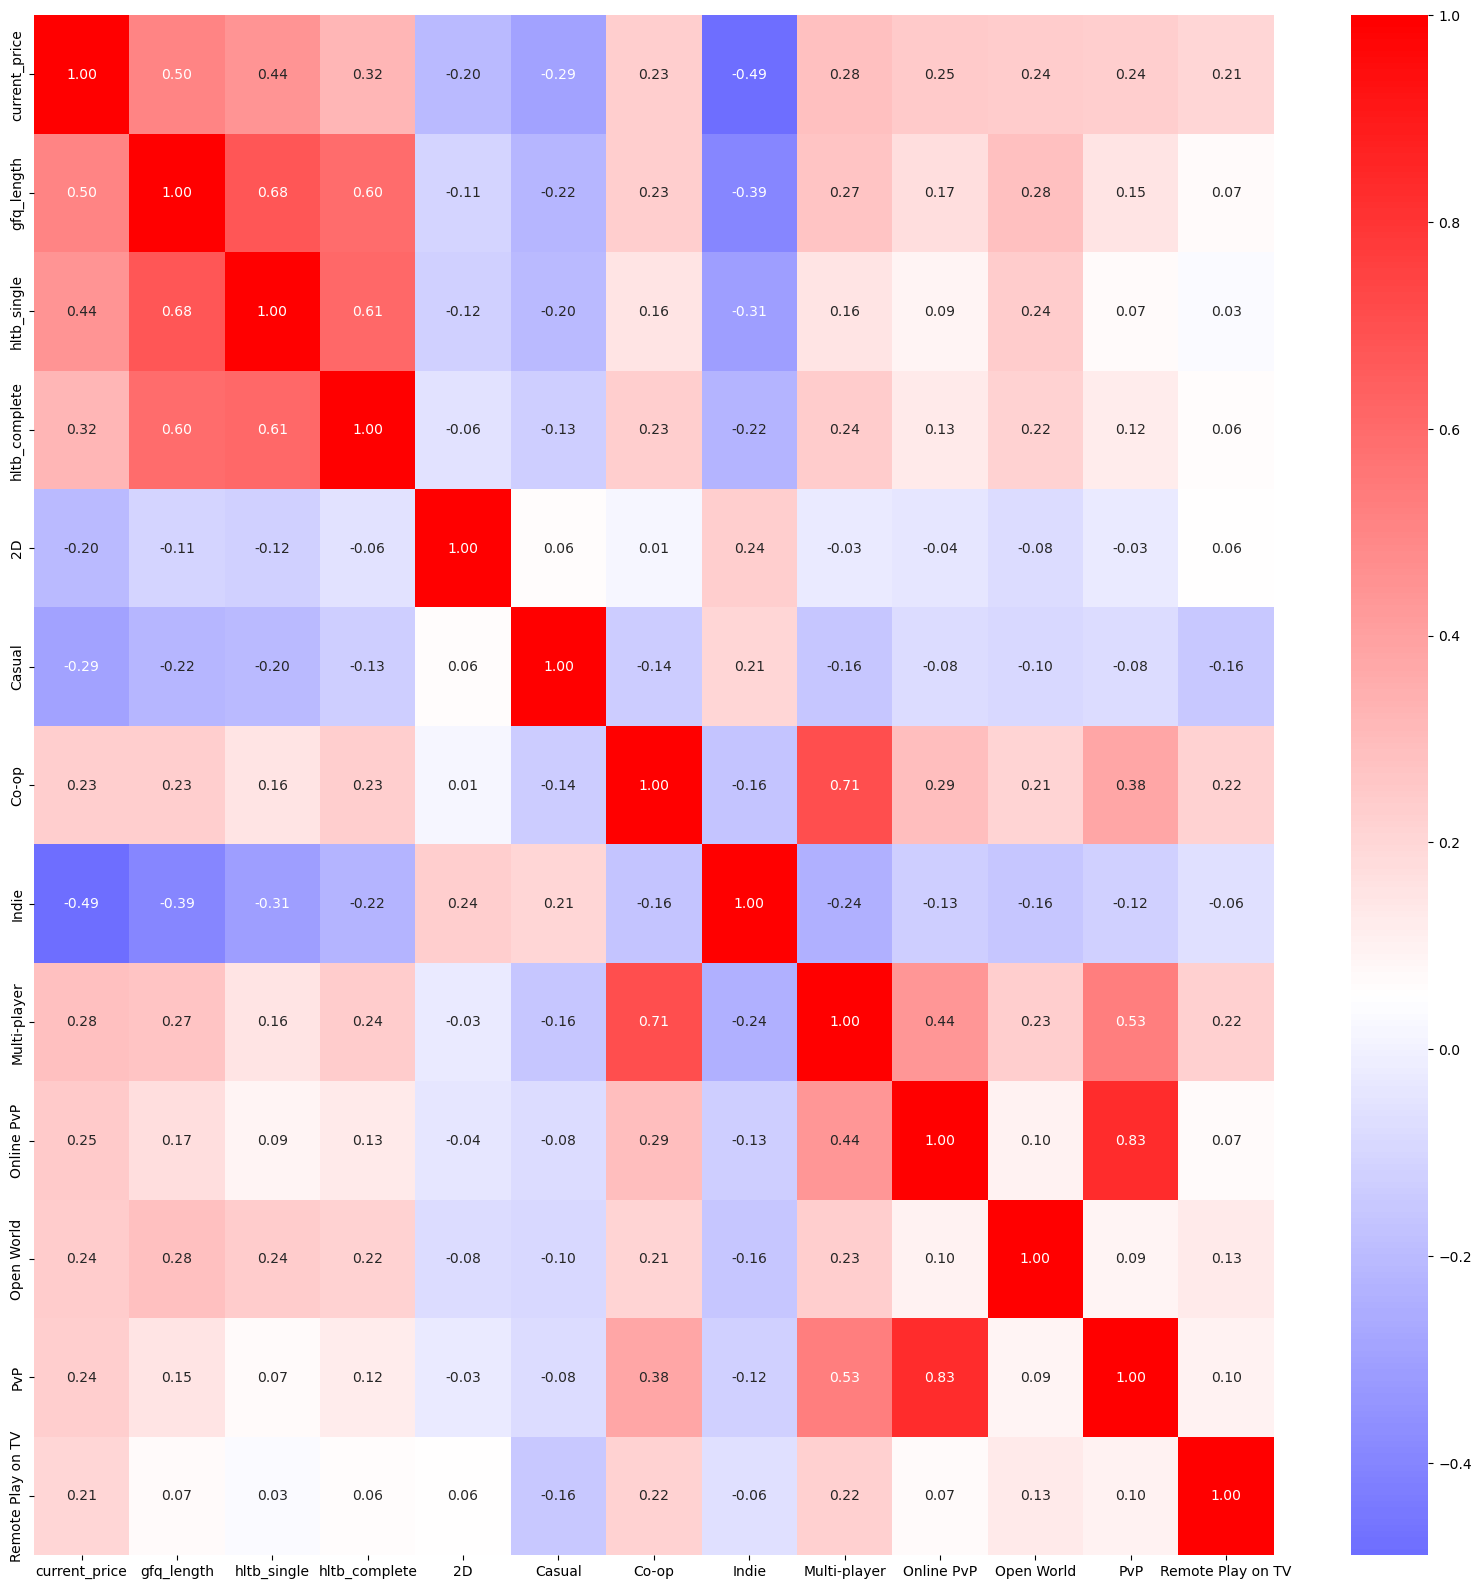

In [177]:
corr_matrix = df_encoded.corr()

# Filtrar colunas com correlação acima de um limiar (0.1 neste caso)
# Verificar primeiro se as colunas estão presentes no DataFrame
cols_to_keep = corr_matrix.columns[corr_matrix.abs()['current_price'] > 0.2]

# Criar uma nova matriz de correlação apenas com as colunas filtradas
filtered_corr_matrix = df_encoded[cols_to_keep].corr()

# Usar seaborn para criar um heatmap da matriz de correlação filtrada
plt.figure(figsize=(20, 20))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='bwr', center= 0.05)

# Mostrar o gráfico
plt.show()

In [178]:
# Calcular a matriz de correlação
corr_matrix = df_encoded.corr()

# Identificar colunas com correlação maior que 0.05 com a coluna 'score'
cols_to_keep = corr_matrix.index[corr_matrix.abs()['current_price'] > 0.2]
cols_to_keep = cols_to_keep.drop('current_price')  # Remover a coluna 'score' da lista

# Preparar os dados
X = df_encoded[cols_to_keep]  # Variáveis independentes
y = df_encoded['current_price']       # Variável dependente

# Dividir o conjunto de dados em treino e teste
X_sm = sm.add_constant(X)

# Construir e treinar o modelo
model_sm = sm.OLS(y, X_sm).fit()

# Exibir o sumário do modelo
print(model_sm.summary())

C:\Users\Lucia\AppData\Local\Temp\ipykernel_13716\1417860343.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_encoded.corr()


                            OLS Regression Results                            
Dep. Variable:          current_price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     246.1
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:10:04   Log-Likelihood:                -31286.
No. Observations:                3803   AIC:                         6.260e+04
Df Residuals:                    3790   BIC:                         6.268e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1561.0385     41.50

In [169]:
print(df_encoded['Multi-player'].sum())
print(df_encoded['Multiplayer'].sum())

903
621


In [170]:
df_encoded['Multi'] = df_encoded['Multi-player'] | df_encoded['Multiplayer']

In [171]:
corr_matrix = df_encoded.corr()

# Identificar colunas com correlação maior que 0.05 com a coluna 'score'
cols_to_keep = corr_matrix.index[corr_matrix.abs()['current_price'] > 0.2]
cols_to_keep = cols_to_keep.drop('current_price')  # Remover a coluna 'score' da lista

# Preparar os dados
X = df_encoded[cols_to_keep]  # Variáveis independentes
y = df_encoded['current_price']       # Variável dependente

# Dividir o conjunto de dados em treino e teste
X_sm = sm.add_constant(X)

# Construir e treinar o modelo
model_sm = sm.OLS(y, X_sm).fit()

# Exibir o sumário do modelo
print(model_sm.summary())

C:\Users\Lucia\AppData\Local\Temp\ipykernel_13716\3991164763.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_encoded.corr()


                            OLS Regression Results                            
Dep. Variable:          current_price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     213.4
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:06:08   Log-Likelihood:                -31276.
No. Observations:                3803   AIC:                         6.258e+04
Df Residuals:                    3788   BIC:                         6.267e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1562.5209     41.47

In [70]:
df = df.drop(columns=['tags','categories', 'genres'])
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3803 entries, 9 to 35029
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   sid             3803 non-null   int64   
 1   store_uscore    3803 non-null   float64 
 2   name            3803 non-null   string  
 3   full_price      3803 non-null   float64 
 4   current_price   3803 non-null   float64 
 5   achievements    3803 non-null   float64 
 6   gfq_difficulty  3803 non-null   category
 7   gfq_length      3803 non-null   float64 
 8   stsp_owners     3803 non-null   float64 
 9   hltb_single     3803 non-null   float64 
 10  hltb_complete   3803 non-null   float64 
dtypes: category(1), float64(8), int64(1), string(1)
memory usage: 330.9 KB


C:\Users\Lucia\AppData\Local\Temp\ipykernel_13716\2474519005.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


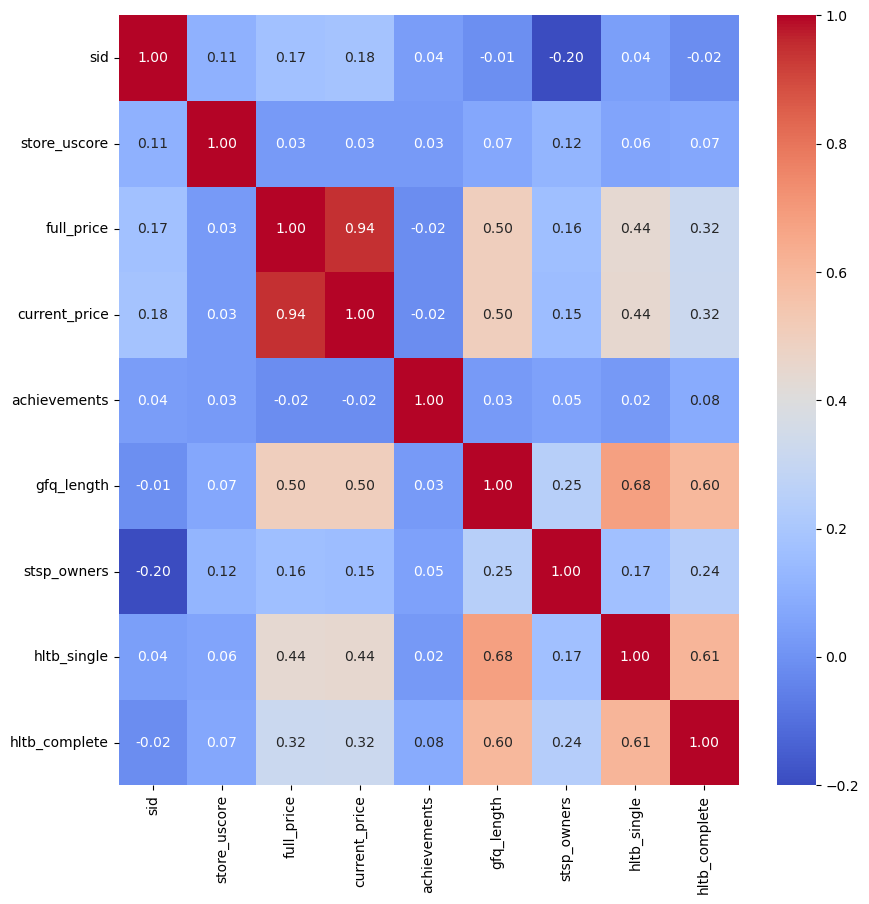

In [72]:
corr_matrix = df.corr()

# Usar seaborn para criar um heatmap (mapa de calor) da matriz de correlação
plt.figure(figsize=(10, 10))  # Ajustar o tamanho da figura
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Mostrar o gráfico
plt.show()

In [ ]:


# Instanciar o MultiLabelBinarizer para fazer o one-hot encoding
mlb = MultiLabelBinarizer()

# Aplicar o one-hot encoding
tags_encoded = pd.DataFrame(mlb.fit_transform(df['tags']), columns=mlb.classes_, index=df.index)

# Concatenar com o DataFrame original (se necessário)
df_encoded = pd.concat([df, tags_encoded], axis=1)
df_encoded.shape

In [ ]:
df['categories'] = df['categories'].apply(lambda x: x.split(',') if x is not None else [])

# Instanciar o MultiLabelBinarizer para fazer o one-hot encoding
mlb = MultiLabelBinarizer()

# Aplicar o one-hot encoding
tags_encoded = pd.DataFrame(mlb.fit_transform(df['categories']), columns=mlb.classes_, index=df.index)

# Concatenar com o DataFrame original (se necessário)
df_encoded = pd.concat([df, tags_encoded], axis=1)
df_encoded.shape

O tamanho do

In [15]:
df_clean = df.dropna()
df_clean.info()

(53981, 46)

#multivalorado
for i in [15,18,19,20,22]:

#categorizar
for i in [21, 25]:

In [17]:


df['categories'] = df['categories'].apply(lambda x: x.split(',') if x is not None else [])

# Instanciar o MultiLabelBinarizer para fazer o one-hot encoding
mlb = MultiLabelBinarizer()

# Aplicar o one-hot encoding
tags_encoded = pd.DataFrame(mlb.fit_transform(df['categories']), columns=mlb.classes_, index=df.index)

# Concatenar com o DataFrame original (se necessário)
df_encoded = pd.concat([df, tags_encoded], axis=1)
df_encoded.shape

(53981, 87)

In [19]:
df_encoded.columns

Index(['sid', 'store_url', 'store_promo_url', 'store_uscore',
       'published_store', 'published_meta', 'published_stsp', 'published_hltb',
       'published_igdb', 'image', 'name', 'description', 'full_price',
       'current_price', 'discount', 'platforms', 'developers', 'publishers',
       'languages', 'voiceovers', 'categories', 'genres', 'tags',
       'achievements', 'gfq_url', 'gfq_difficulty', 'gfq_difficulty_comment',
       'gfq_rating', 'gfq_rating_comment', 'gfq_length', 'gfq_length_comment',
       'stsp_owners', 'stsp_mdntime', 'hltb_url', 'hltb_single',
       'hltb_complete', 'meta_url', 'meta_score', 'meta_uscore', 'grnk_score',
       'igdb_url', 'igdb_single', 'igdb_complete', 'igdb_score', 'igdb_uscore',
       'igdb_popularity', 'Captions available', 'Co-op',
       'Commentary available', 'Cross-Platform Multiplayer',
       'Full controller support', 'In-App Purchases', 'Includes Source SDK',
       'Includes level editor', 'LAN Co-op', 'LAN PvP', 'Local Co-op